# Matematički softver
## Prvi kolokvij

Ovo je "open book" kolokvij. Dozvoljeno je korištenje bilo kakvih materijala — bilješke s vježbi,
help, tutoriali, postovi na online forumima,... — nastalih _prije_ kolokvija (npr. dozvoljeno je na _StackOverflowu_ naći rješenje nekog zadatka, ali nije dozvoljeno tamo postaviti pitanje kako se rješava neki zadatak).

Također, nije dozvoljena komunikacija (razgovor, _chat_, razmjena bilježaka) među studentima.

Rješenja zadataka pišite u ovu bilježnicu, koju na kraju pošaljite sa Subjectom "MS K1" na veky@math.hr. Rješenje svakog zadatka mora biti samo sebi dovoljno (ponovite `import`e koji vam trebaju), i mora se moći izvršiti bez warninga i grešaka.

Predviđeno vrijeme rješavanja je 90 minuta. Svaki zadatak vrijedi 8 bodova. Maksimalni broj bodova koji se može osvojiti je 40.

### Prvi zadatak

Napišite funkciju `usporedi` koja prima dvije liste, u svakoj od kojih se nalaze samo cijeli brojevi (`int`) i stringovi (`str`). Ako nisu jednake duljine, `usporedi` vraća `False`. Ako jesu, `usporedi` treba ustanoviti jesu li elementi na odgovarajućim pozicijama "slični".

* dva cijela broja su slični ako je jedan od njih (bilo koji) djeljiv onim drugim
* dva stringa su slični ako su jednaki do na veličinu slova (_case insensitive_)
* string i cijeli broj nisu nikada slični

Primjerice, `usporedi([a, b, c], [d, e, f])` treba vratiti `True` ako su `a` i `b` slični, `c` i `d` slični, te `e` i `f` slični.

In [12]:
all([
    usporedi([24, 'v'], [12, 'V']) == True,
    usporedi([1, 2], [1]) == False,
    usporedi([1, 't'], ['t', 1]) == False,
    usporedi(['', 0, 'Wäßrig'], ['', 52, 'WÄSSRIG'])
])

True

In [72]:
def usporedi(lista1, lista2):
    if (len(lista1)!=len(lista2)) return False
else 
for rijec1,rijec2 in lista1,lista2:
    if rijec1%rijec2 != 0 return False
    else if rijec1!=rijeec2 return False
else return True

SyntaxError: invalid syntax (<ipython-input-72-3b7f18383e73>, line 2)

### Drugi zadatak

U varijabli `kocke` nalazi se tri milijuna rezultata bacanja igraće kocke.

In [87]:
import numpy as np

In [100]:
kocke = 1 + np.random.randint(0, 6, 3_000_000, dtype=np.int8)
A = np.reshape(kocke, [750000, 4])
A
broj_bacanja = 3_000_000


#### a)

Interpretirajte `kocke` kao niz pokusa bacanja po četiri kocke (ne kopirajte podatke, samo im promijenite oblik).

Izračunajte, i izrazite u postotcima na dvije decimale, _a posteriori_ vjerojatnost da se u bacanju četiri kocke pojavi bar jedna šestica. Isplati li se kladiti (1:1) na taj događaj? 

#### b)

Sada reinterpretirajte `kocke` kao niz pokusa, svaki od kojih se sastoji od 24 bacanja 2 kocke (trodimenzionalni tenzor).

Odgovorite na ista pitanja kao u **a)**, za događaj da se u 24 bacanja 2 kocke bar jednom pojavi dvostruka šestica.

### Treći zadatak

U datoteci `bodovi.csv` nalaze se bodovi studenata nekog izmišljenog kolegija. Stupci su redom ime i prezime studenta, bodovi s prvog i drugog kolokvija, te bodovi s tri zadaće.

* Učitajte datoteku u DataFrame.
* Dodajte stupac `Kolokviji` koji predstavlja zbroj bodova na oba kolokvija.
* Dodajte stupac `Zadaće` koji predstavlja ukupan broj bodova na zadaćama. Najslabije napisana zadaća se ne računa.
* Odredite je li bolje (u prosjeku) bio napisan prvi ili drugi kolokvij.
* Ispišite _top 10_ studenata po ukupnim bodovima (kolokviji plus zadaće).

Sve radite u jednom DataFrameu. Smijete dodavati i pomoćne stupce (osim dva gore zadana), ali ih morate obrisati kasnije.

In [15]:
import pandas as pd
import urllib.request as rq
import pathlib
with rq.urlopen('https://github.com/vedgar/ms/blob/master/bodovi.csv') as url:
    pathlib.Path('bodovi.csv').write_bytes(url.read())

In [44]:
header = 'ime prezime bodovi1 bodovi2 zad1 zad2 zad3'.split()
df = pd.read_csv('bodovi.tsv',delimiter='\t', names=header)

df['kolokviji'] = df['bodovi1']+df['bodovi2']
df.head()
df['zadaće']= df['zad1']+df['zad2']+df['zad3']
df.head()
prvi = df['bodovi1'].sum()
drugi = df['bodovi2'].sum()
ukupno_ucenika =len(df.index)

kol1 = prvi/ukupno_ucenika

kol2 = drugi/ukupno_ucenika
print(kol1,kol2)

15.527 18.996


U prosjeku je bolje napisan drugi kolokvij.

In [57]:

df['ukupno'] = df['kolokviji']+df['zadaće']
df.head()
df.sort_values(by='ukupno', ascending=False).head(10)


,ime,prezime,bodovi1,bodovi2,zad1,zad2,zad3,kolokviji,zadaće,ukupno
599,Mercedes,Boone,30,30,4,5,5,60,14,74
50,Lea,Henry,30,30,5,4,4,60,13,73
450,Ryker,Tate,30,30,4,5,3,60,12,72
64,Rowan,Madden,27,30,5,5,5,57,15,72
610,Stephany,Mason,30,30,3,5,3,60,11,71
603,Joy,Dorsey,30,30,4,5,2,60,11,71
204,Makaila,Schaefer,30,30,4,5,2,60,11,71
57,Daniella,Collins,27,30,5,4,5,57,14,71
909,Hillary,Gentry,30,30,4,2,5,60,11,71
673,Mia,Yu,29,30,2,5,4,59,11,70


### Četvrti zadatak

Nacrtajte, jedan pored drugog sa zajedničkom osi ordinata, grafove funkcijâ $f(x)=1/x$ i $g(x)=1/x^2$ na segmentu $[-1,1]$.

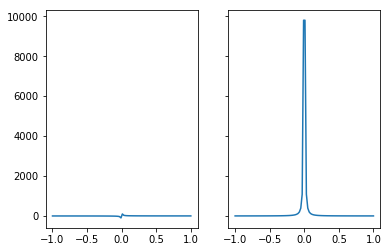

In [71]:
import matplotlib.pyplot as plt
import numpy as np
fig1, (ax1,ax2) = plt.subplots(1, 2, sharey=True)
domena = np.linspace(-1, 1, 100)
ax1.plot(domena, 1/domena)
ax2.plot(domena, 1/domena**2)

### Peti zadatak

Riješite egzaktno diferencijalnu jednadžbu $x\,y\,'+y=x\sin x$ uz početni uvjet $y\left(\frac\pi2\right)=-\frac12$.

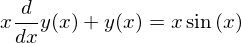

In [11]:
import sympy as sp
sp.init_printing()
x = sp.Symbol('x')
y = sp.Function('y')
from IPython.display import display

jednadzba = sp.Eq(x*y(x).diff(x)+y(x) , x*sp.sin(x))
jednadzba


In [74]:
a = sp.dsolve(jednadzba,y(x))

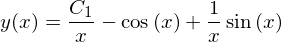

In [75]:
a

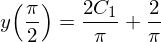

In [83]:
b = a.subs(x, sp.pi/2)
b

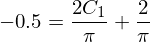

In [82]:
b.subs(y(sp.pi/2), -1/2)